
# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


The dataset I chose to analyze and report on is the TMDb Movie Dataset. In this dataset, there is information collected from TMDb about 10,000 movies. The columns found in this dataset are:
- id: Unique identifier for each movie
- imdb_id: IMDb's unique identifier for each movie
- popularity: Score indicating popularity of each movie
- budget: Budget of the movie in USD
- revenue: Revenue of the movie in USD
- original_title: Title of the movie
- cast: Cast of the movie
- homepage: URL of the official website for the movie
- director: Director(s) of the movie
- tagline: Tagline or slogan used to market the movie
- overview: Brief summary of the movie
- runtime: Duration of the movie in minutes
- genres: Genre(s) of the movie
- production_companies: Companies that produced the movie
- release_date: Date the movie was released
- vote_count: Number of votes received for the movie
- vote_average: Average vote rating
- release_year: The year the movie was released
- budget_adj: Budget adjusted for inflation in USD
- revenue_adj: Revenue adjusted for inflation in USD



### Question(s) for Analysis

This dataset contains a lot of data, but what intrigued me the most was the genres. Some of the movies contain a singular genre, while other contain as many as 5!
This made me want to analyze the genre data.

My research question that I want to explore is: 

### What are the most popular movie genres throughout the years?


>This questions involves the use and exploration of the release_year, genres, and popularity variables.


First we will begin by importing pandas and numpy.

In [51]:
import pandas as pd
import numpy as np

Next I will load the CSV file containing the TMDb movie data.

In [52]:
df_movies = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df_movies.head()
#   Looking at data using .head()
#   We can see the basic structure of this dataset and what kind of data can be found in it.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I will now use different methods to further examine the data, including .describe, .shape, .dtypes, .info(), .value_counts(), and .duplicated()

In [53]:
#   Examining the data with .describe()
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [54]:
#  Checking the shape of the dataset
#   We can see there are 10866 rows and 21 columns
df_movies.shape

(10866, 21)

In [55]:
#   Checking data types with .dtypes
#   release_date is currently an object but should be datetime; we will convert that in the next step. 
#   Converting release_date to a datetime object will make it easier to work with if it gets used.
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [56]:
#   Checking for null values using .info()
#
#   The following variables contain null values: imdb_id, cast, homepage, director, tagline, keywords,
#   overview, genres, and production_companies. These are all string objects. 
#
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [57]:
#   This tells us the amount of each specific combination of genres.
df_movies.genres.value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64

In [58]:
#   Checking for the number of duplicated items; in this case there is only one duplicate.
sum(df_movies.duplicated())

1


### Data Cleaning

As seen in the previous section, there were null values found in imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies. These are all string values, and I don't want to blindly drop them all before getting into the analysis. So we are going to leave them as is for now, and drop them if needed for any specific calculations or visulizations futher in the analysis. 

In [59]:
#   You can see again that the only null values found are string objects. None of the ints or floats are null - this is 
#   important to note because handling null values that should be numeric is crucial for proper calculations.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Next, I am changing release_date to a datetime object. This will ensure correct formatting.

In [60]:
#   Changing release_date from an object to datetime
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
#   Confirming correction with dtype
df_movies.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In the previous section, we identified 1 duplicate. Below, I am dropping that duplicate and confirming it was dropped.

In [61]:
#   Dropping duplicate
df_movies.drop_duplicates(inplace=True)
#   Confirming duplicate was dropped
sum(df_movies.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1: What are the most popular movie genres throughout the years?

First I want to look at all of the data in the genres column to get a better idea of what we're working with.

In [62]:
df_movies['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10865, dtype: object

We can see that each row contains one or more genres, separated by the pipe delimiter ( | ).

Below, I am removing any null values and then removing the pipe delimter from the genre data, so it is cleaner.

In [63]:
df = df_movies[df_movies['genres'].notna()]

In [64]:
df_movies['genres'] = df['genres'].str.split('|')
df_movies['genres']

0        [Action, Adventure, Science Fiction, Thriller]
1        [Action, Adventure, Science Fiction, Thriller]
2                [Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
                              ...                      
10861                                     [Documentary]
10862                        [Action, Adventure, Drama]
10863                                 [Mystery, Comedy]
10864                                  [Action, Comedy]
10865                                          [Horror]
Name: genres, Length: 10865, dtype: object

This looks much better now, but we need to separate all of the genres. I will be using .explode() to separate the genres.

This gives us a limitation:
>Each movie in the dataset has between 1 and 5 genres. In order to analyze the genres individually, I used the explode() method which created separate rows for each genre. This means that for movies with more than one genre, they are counted once per genre. 
While this makes it easier to calculate frequencies and create visualizations, it also gives us a limitation: it may overrepresent certain movies with multiple genres and diminish the uniqueness of multi-genre movies. As a result, this method doesn't fully reflect movies with multiple genres. 
However, this was a necessary trade off to conduct a clearer analysis. 

In [65]:
all_genres = df_movies['genres'].explode()
all_genres

0                 Action
0              Adventure
0        Science Fiction
0               Thriller
1                 Action
              ...       
10863            Mystery
10863             Comedy
10864             Action
10864             Comedy
10865             Horror
Name: genres, Length: 26978, dtype: object

Now we have every genre listed out separately. Next I will aggregate the genre data so we can have totals for each.

In [66]:
genre_count = all_genres.value_counts()
genre_count

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

We will soon begin plotting the data. In order to prepare for plotting charts and doing so efficiently, I have created a function that adds labels. The title is a required parameter, but the x and y labels are optional. 

In [67]:
#   I have created the below function to add title and axis labels to each plot I make. This function
#   makes it easier to label the plots and keep the formatting consistent among them.

def add_labels(ax, title, xlabel='', ylabel=''):
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

The following bar chart shows the total count of each genre found in the data.

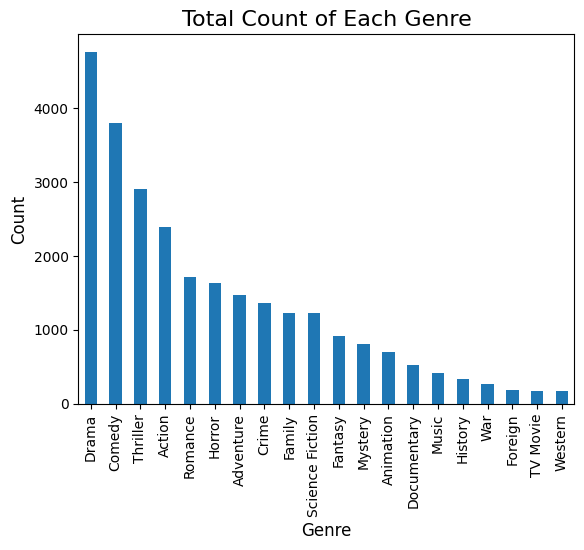

In [68]:
genre_plot = genre_count.plot(kind='bar');
add_labels(genre_plot, 'Total Count of Each Genre', xlabel='Genre', ylabel='Count')

Next, I want to analyze the popularity of the genres throughout the years. We will begin by filtering our dataset so we are only working with the release year, popularity, and genre. Since I exploded the genre data previously into the all_genres variable, I will be using join() to join that data to the release year and popularity data. I will also be dropping any null values. 

In [69]:
genre_info = df_movies[['release_year', 'popularity']].join(all_genres).dropna()

In [70]:
genre_info

,release_year,popularity,genres
0,2015,32.985763,Action
0,2015,32.985763,Adventure
0,2015,32.985763,Science Fiction
0,2015,32.985763,Thriller
1,2015,28.419936,Action
...,...,...,...
10863,1966,0.065141,Mystery
10863,1966,0.065141,Comedy
10864,1966,0.064317,Action
10864,1966,0.064317,Comedy


Next, I want to find the total the popularity for each genre for each year. This will allow me to eventually find the most popular genre for each year. 

In [71]:
grouped_genres = genre_info.groupby(['release_year', 'genres'])['popularity'].sum().reset_index()

In [72]:
grouped_genres

,release_year,genres,popularity
0,1960,Action,4.725796
1,1960,Adventure,3.504904
2,1960,Comedy,3.168003
3,1960,Crime,0.692959
4,1960,Drama,7.361967
...,...,...,...
1044,2015,Science Fiction,193.121886
1045,2015,TV Movie,5.211474
1046,2015,Thriller,239.720907
1047,2015,War,11.560600


The cell below confirms we still have the same counts for each genre

In [73]:
total_genres = genre_info['genres'].value_counts()
total_genres

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

Next, we are sorting the release year from least to greatest, and the popularity from greatest to least so we can find the genre with the greatest popularity in each year. 

In [74]:
genre_by_year = grouped_genres.sort_values(['release_year', 'popularity'], ascending=[True, False]).drop_duplicates('release_year')

In [75]:
genre_by_year

,release_year,genres,popularity
4,1960,Drama,7.361967
21,1961,Drama,6.915731
37,1962,Drama,8.232008
64,1963,Thriller,7.199292
70,1964,Comedy,7.859657
90,1965,Drama,6.105756
109,1966,Drama,5.436264
127,1967,Drama,8.183477
143,1968,Drama,7.546450
160,1969,Drama,6.368528


As we can see in the table above, the indexes are all over the place. Let's fix that!

In [76]:
genre_by_year.reset_index(drop=True, inplace=True)

Now let's confirm the indexes are in order.

In [77]:
genre_by_year.head()

,release_year,genres,popularity
0,1960,Drama,7.361967
1,1961,Drama,6.915731
2,1962,Drama,8.232008
3,1963,Thriller,7.199292
4,1964,Comedy,7.859657


Next, I want to see which genre was most popular each year from 1960 to 2015. The following is a bar chart demonstrating just that!

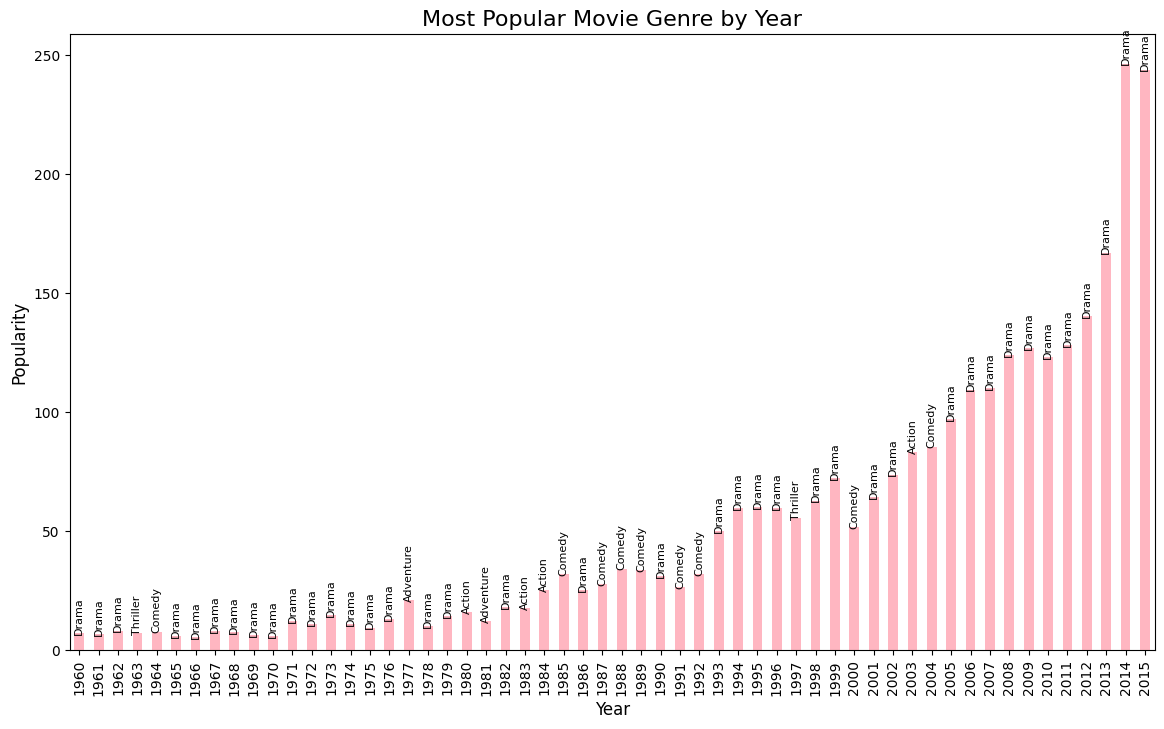

In [78]:
genre_plot = genre_by_year.plot(x='release_year', y='popularity', kind='bar', figsize=(14,8), legend=False, color='lightpink');

add_labels(genre_plot, 'Most Popular Movie Genre by Year', 'Year', 'Popularity')

for i, (popularity, genre) in enumerate(zip(genre_by_year['popularity'], genre_by_year['genres'])):
    genre_plot.text(i, popularity + 0.1, genre, ha='center', rotation=90, fontsize=8)

As we can see in the bar chart, there are a lot of years plotted and it's alot to look at. In the following pie chart, I have aggregated the data from the bar chart so we can more easily visualize how popular each genre has been. 

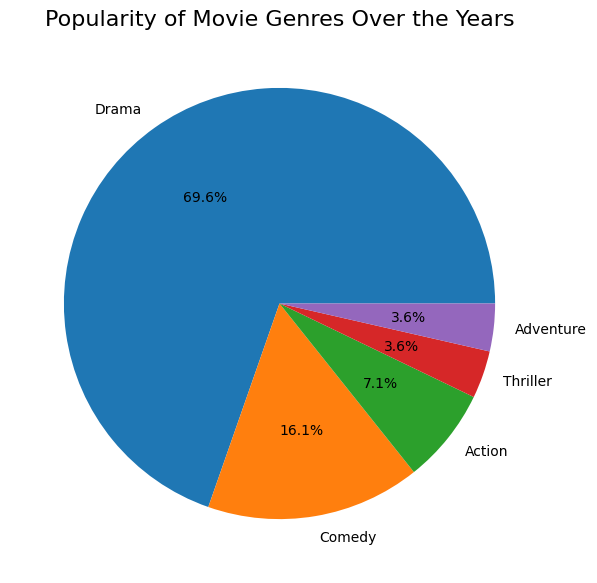

In [79]:
genre_pie = genre_by_year['genres'].value_counts().plot(kind='pie', figsize=(7,7), ylabel='', autopct='%1.1f%%');

add_labels(genre_pie, 'Popularity of Movie Genres Over the Years')

Next I want to visualize the popularity of each genre throughout the years. Below is a multi-line graph depicting the variation in popularity among the top 5 genres in the dataset. You may notice that there is one difference in the genres plotted in the bar and pie charts compared to the following line graph. 

The line graph includes the genre Romance, while the bar and pie charts inlcude Adventure.

### Why?

>This is because in the bar and pie charts, the genre with the highest popularity was plotted for each year. Whereas in the line chart, we are plotting the overall top genres in terms of frequency and looking at the trend of those genres over the years. 


We can see there are null values because in some of the columns, there are no movies with those genres in those years. To fix this, we will fill in those missing values with 0. This will show that the genre was not present in that year.

In [80]:
avg_pop = genre_info.groupby(['release_year', 'genres'])['popularity'].mean().unstack()
avg_pop.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,NaN,0.396000,0.346479,NaN,0.566305,0.278064,0.428247,0.194948,0.412364,0.591450,0.423531,NaN,0.541227,0.327905,NaN,0.811910,0.225863,0.567759
1961,0.365913,0.767323,2.631987,0.679838,0.806519,NaN,0.432233,0.755722,0.154073,0.113651,0.334463,0.254578,0.564748,0.712793,0.426036,0.274103,NaN,NaN,0.531184,0.210021
1962,0.708945,0.942513,NaN,0.273183,0.472816,NaN,0.392000,0.323463,0.235542,0.235542,0.600060,0.179368,0.323933,0.259220,0.365621,0.179212,NaN,0.760582,0.506162,0.414180
1963,0.951729,0.728487,2.180410,0.444481,0.552367,NaN,0.322448,0.852632,0.214071,0.351647,0.481618,0.376901,NaN,0.421033,0.399573,0.467835,NaN,0.719929,0.664326,0.246957
1964,0.813087,0.736431,0.445746,0.491229,0.261690,NaN,0.364818,0.878298,0.599791,0.152209,0.316377,0.189650,0.753799,0.308091,0.221586,0.226636,NaN,0.622580,0.930959,0.127679


In the next cell I am filling the missing values with 0.

In [81]:
avg_pop = avg_pop.fillna(0)
avg_pop.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,0.000000,0.396000,0.346479,0.0,0.566305,0.278064,0.428247,0.194948,0.412364,0.591450,0.423531,0.000000,0.541227,0.327905,0.0,0.811910,0.225863,0.567759
1961,0.365913,0.767323,2.631987,0.679838,0.806519,0.0,0.432233,0.755722,0.154073,0.113651,0.334463,0.254578,0.564748,0.712793,0.426036,0.274103,0.0,0.000000,0.531184,0.210021
1962,0.708945,0.942513,0.000000,0.273183,0.472816,0.0,0.392000,0.323463,0.235542,0.235542,0.600060,0.179368,0.323933,0.259220,0.365621,0.179212,0.0,0.760582,0.506162,0.414180
1963,0.951729,0.728487,2.180410,0.444481,0.552367,0.0,0.322448,0.852632,0.214071,0.351647,0.481618,0.376901,0.000000,0.421033,0.399573,0.467835,0.0,0.719929,0.664326,0.246957
1964,0.813087,0.736431,0.445746,0.491229,0.261690,0.0,0.364818,0.878298,0.599791,0.152209,0.316377,0.189650,0.753799,0.308091,0.221586,0.226636,0.0,0.622580,0.930959,0.127679


Next I am pulling the first 5 genres from the top_genres list using .head(). The top_genres list was previously made by pulling the total counts for each genre. 

In [82]:
top_genres = total_genres.head().index
top_genres

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance'], dtype='object')

Next, I am making sure that the genres I'm working with are only the ones in top_genres.

In [83]:
df_top_genres = genre_info[genre_info['genres'].isin(top_genres)]
df_top_genres

,release_year,popularity,genres
0,2015,32.985763,Action
0,2015,32.985763,Thriller
1,2015,28.419936,Action
1,2015,28.419936,Thriller
2,2015,13.112507,Thriller
...,...,...,...
10862,1966,0.065543,Action
10862,1966,0.065543,Drama
10863,1966,0.065141,Comedy
10864,1966,0.064317,Action


Finally, I have my data for the popularity of each genre per year. This is what we will use to plot the line graph. 

In [84]:
pop_by_year_and_genre = df_top_genres.groupby(['release_year', 'genres'])['popularity'].mean().unstack()

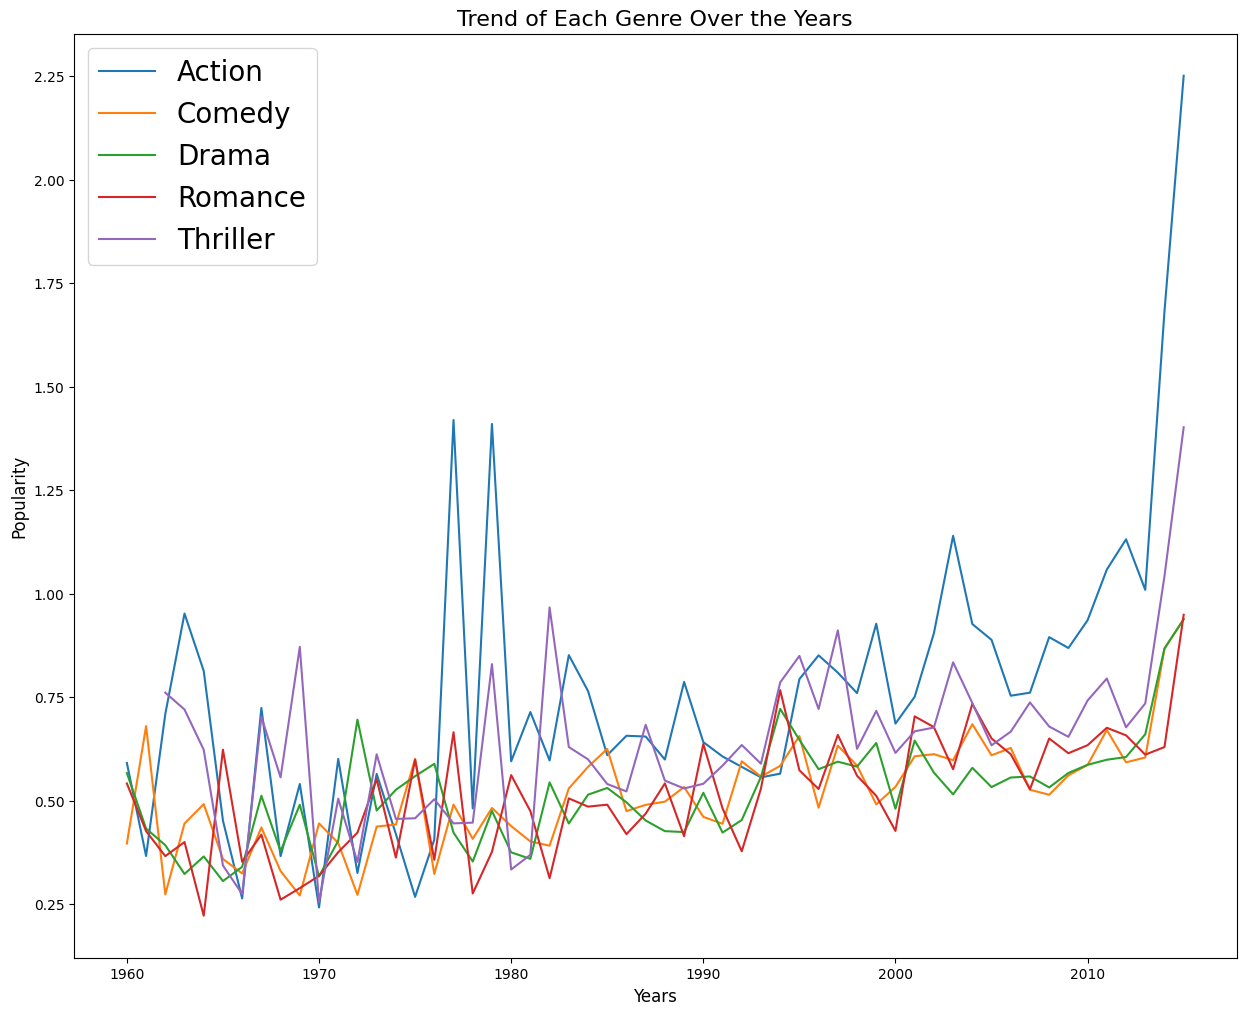

In [85]:
avg_pop_plot = pop_by_year_and_genre.plot(figsize=(15,12));
add_labels(avg_pop_plot,"Trend of Each Genre Over the Years", xlabel='Years', ylabel='Popularity')
avg_pop_plot.legend(fontsize=20);

### Using Numpy
> Below I used Numpy to calculate the mean and standard deviation to better understand the distribution of movie popularity.

In [86]:
pop_arr = df_movies['popularity'].explode().values
mean_pop = np.mean(pop_arr)
std_pop = np.std(pop_arr)

In [87]:
print(f'Mean movie popularity: {mean_pop:.2f}')
print(f'Standard deviation: {std_pop:.2f}')

Mean movie popularity: 0.65
Standard deviation: 1.00


From these calculations, we can assume that on average most movies in the dataset score pretty low on popularity. With the standard deviation being 1.00, it indicates that the popularity of movies is pretty spread out, with the occasional highly popular movie. 

<a id='conclusions'></a>
## Conclusions

>In this report I explored the question: What are the most popular movie genres throughout the years? The first bar chart shows that in all of the data, Drama is the most popular genre. Comedy, Thriller, and Action follow Drama. The second bar chart shows the top genre for each year. Just by looking at this chart, you can see that Drama comes up most frequently. But to further clarify this, the pie chart shows the percentages of each genre found on that bar chart. The pie chart verifies the intial assumption that Drama is most frequent, at 69.6%. Lastly, in the line chart we can see that each genre varied in frequency over the years. Action has the most spikes in frequency, the largest one being at the end of the graph right after 2010. The Thriller genre saw a spike in frequency around 2010 as well. From this line graph, we can see that although Drama may have been the most popular genre throughout the years, the genres that had the greatest increase in frequency were Action and Thriller.

>With more time or data, it would be interesting to explore how the popularity correlates with the budget and revenue, or how trends in genres differ by country. 

In [88]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 793393 bytes to Investigate_a_Dataset.html
